Step 1 - Importing Libraries

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Step 2 - Importing Data

In [2]:
# Load the dataset
df = pd.read_csv("loan.csv")

Step 3 - Data Cleaning

In [3]:
# Let us look at the dataframe
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Checking volumns with more than 90% missing values
df.columns[df.apply(lambda df:(df.isnull().sum()/len(df))*100>=90)]

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [5]:
# Drop columns with greater than 90% missing values
df=df.drop(df.columns[df.apply(lambda df:(df.isnull().sum()/len(df))*100>=90)],axis=1)
df.shape

(39717, 55)

In [6]:
# Checking the % of columns wrt having missing values
((df.isnull().sum()/len(df))*100).sort_values(ascending= False)

mths_since_last_delinq        64.662487
desc                          32.585543
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
out_prncp                      0.000000
initial_list_status            0.000000
out_prncp_inv                  0.000000
total_pymnt                    0.000000
total_acc                      0.000000
total_pymnt_inv                0.000000
recoveries                     0.000000
total_rec_prncp                0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
pub_rec                        0.000000
collection_recovery_fee        0.000000
last_pymnt_amnt                0.000000


In [7]:
# Let us drop all Current `loan_status` holders since we can't predict whether they will end up fully paying or being charged off
df=df[df['loan_status']!='Current']
df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

In [8]:
# Let us also drop off columns associated with those are currently repaying loan and it's variables
df=df.drop(['installment','last_pymnt_d','revol_util','earliest_cr_line', 'total_pymnt', 'last_pymnt_amnt',
       'last_credit_pull_d',],axis=1)

In [9]:
# Let us check columns with lots of null values
df.isnull().sum().sort_values(ascending=False)   

mths_since_last_delinq        24905
desc                          12529
emp_title                      2386
emp_length                     1033
pub_rec_bankruptcies            697
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
tax_liens                        39
title                            11
total_pymnt_inv                   0
pub_rec                           0
revol_bal                         0
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_rec_late_fee                0
total_rec_prncp                   0
total_rec_int                     0
recoveries                        0
collection_recovery_fee           0
policy_code                       0
application_type                  0
acc_now_delinq                    0
delinq_amnt                       0
open_acc                          0
id                                0
inq_last_6mths              

In [10]:
# Let us check the loan dataframe
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,...,recoveries,collection_recovery_fee,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,B,B2,NaN,...,0.00,0.00,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,C,C4,Ryder,...,117.08,1.11,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,C,C5,NaN,...,0.00,0.00,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,C,C1,AIR RESOURCES BOARD,...,0.00,0.00,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,A,A4,Veolia Transportaton,...,0.00,0.00,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,A,A4,FiSite Research,...,0.00,0.00,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,C,C1,"Squarewave Solutions, Ltd.",...,0.00,0.00,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,A,A4,NaN,...,0.00,0.00,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,A,A2,NaN,...,0.00,0.00,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [11]:
# It appears lot of columns still have a constant, non unique and zero or NaN values which will not be an influencing factor into our coming analysis, so let us drop them
df = df.drop(['id','member_id','policy_code','application_type','acc_now_delinq','delinq_amnt','tax_liens','pub_rec_bankruptcies','url','desc','zip_code','emp_title','title','out_prncp','out_prncp_inv'],axis=1)
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_acc,initial_list_status,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,chargeoff_within_12_mths
0,5000,5000,4975.0,36 months,10.65%,B,B2,10+ years,RENT,24000.0,...,9,f,5833.84,5000.00,863.16,0.00,0.00,0.00,0.0,0.0
1,2500,2500,2500.0,60 months,15.27%,C,C4,< 1 year,RENT,30000.0,...,4,f,1008.71,456.46,435.17,0.00,117.08,1.11,0.0,0.0
2,2400,2400,2400.0,36 months,15.96%,C,C5,10+ years,RENT,12252.0,...,10,f,3005.67,2400.00,605.67,0.00,0.00,0.00,0.0,0.0
3,10000,10000,10000.0,36 months,13.49%,C,C1,10+ years,RENT,49200.0,...,37,f,12231.89,10000.00,2214.92,16.97,0.00,0.00,0.0,0.0
5,5000,5000,5000.0,36 months,7.90%,A,A4,3 years,RENT,36000.0,...,12,f,5632.21,5000.00,632.21,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07%,A,A4,4 years,MORTGAGE,110000.0,...,40,f,1213.88,2500.00,322.97,0.00,0.00,0.00,NaN,NaN
39713,8500,8500,875.0,36 months,10.28%,C,C1,3 years,RENT,18000.0,...,9,f,1020.51,8500.00,1413.49,0.00,0.00,0.00,NaN,NaN
39714,5000,5000,1325.0,36 months,8.07%,A,A4,< 1 year,MORTGAGE,100000.0,...,20,f,1397.12,5000.00,272.16,0.00,0.00,0.00,NaN,NaN
39715,5000,5000,650.0,36 months,7.43%,A,A2,< 1 year,MORTGAGE,200000.0,...,26,f,672.66,5000.00,174.20,0.00,0.00,0.00,NaN,NaN


In [12]:
# Let us see columns which have a non unique value 
df.nunique().sort_values(ascending=False) 

total_pymnt_inv               36387
total_rec_int                 34025
revol_bal                     21275
funded_amnt_inv                8050
total_rec_prncp                6841
annual_inc                     5215
recoveries                     4040
dti                            2853
collection_recovery_fee        2616
total_rec_late_fee             1320
funded_amnt                    1019
loan_amnt                       870
int_rate                        370
mths_since_last_delinq           95
total_acc                        82
issue_d                          55
addr_state                       50
open_acc                         40
sub_grade                        35
purpose                          14
delinq_2yrs                      11
emp_length                       11
inq_last_6mths                    9
grade                             7
pub_rec                           5
home_ownership                    5
verification_status               3
term                        

Let us standardize the Data

In [13]:
# Lets remove % symbol from intrest rate column
df['int_rate'] = df['int_rate'].str.rstrip('%')

# Lets remove 'months' from term column and convert to float
df['term'] = df['term'].str.rstrip(' months').astype(float)

<Axes: ylabel='annual_inc'>

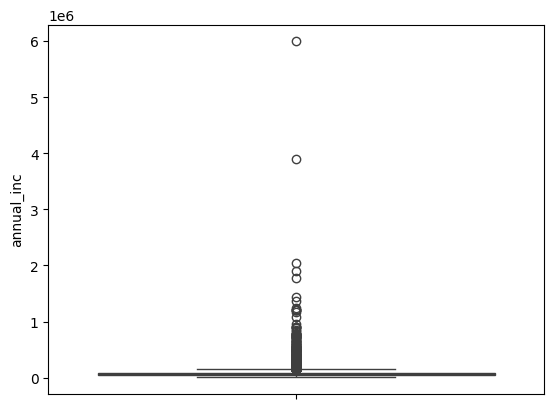

In [14]:
# Let us check for the presence of Outliers with a boxplot for annual income
sns.boxplot(df.annual_inc)

This observations shows presence of ouliers of large proportions

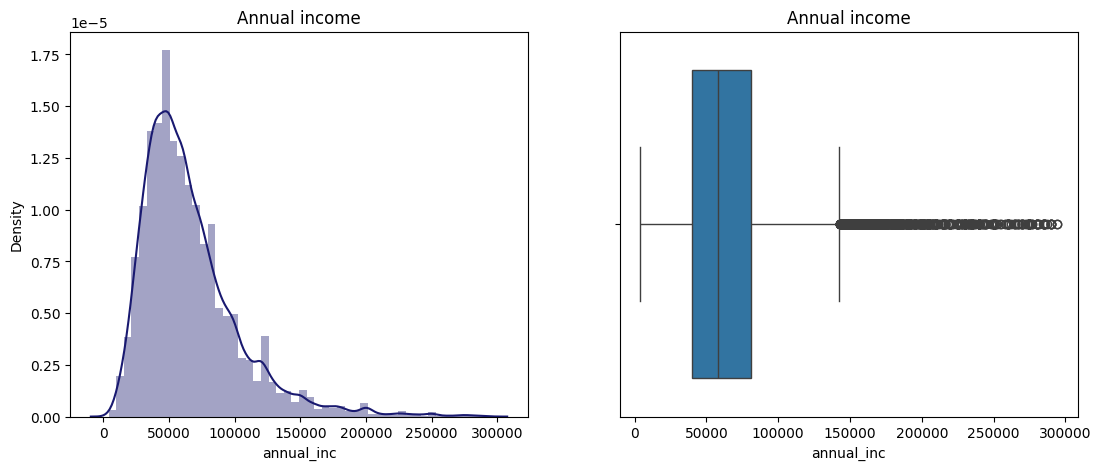

In [15]:
# creating a function for plotting the distribution
def pltDist(df, clmn, title):
    plt.figure(figsize = (13,5))
    plt.subplot(1,2,1)
    sns.distplot(df[clmn], color = 'midnightblue')
    plt.title(title)
    plt.subplot(1,2,2)
    sns.boxplot(data =df, x=clmn,orient='h')
    plt.title(title)

# Getting rid of outliers in Annual income
th = df["annual_inc"].quantile(0.995)
df = df[df['annual_inc']<th]
pltDist(df, 'annual_inc', 'Annual income')

In [16]:
# Checking ranges of annual income now 
df['annual_inc'].describe(percentiles=[0.25,0.5,0.75,0.85, 0.99])

count     38359.000000
mean      66156.572040
std       37321.342395
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
85%      100000.000000
99%      200000.000000
max      294000.000000
Name: annual_inc, dtype: float64

In [17]:
# Checking the columns
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'initial_list_status', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths'],
      dtype='object')

In [18]:
# Let us create two new columns date and year of loan issued from `issue_d`
df['date'] = pd.to_datetime(df['issue_d'], format='%b-%y')

# Extract the year and store it in a new column
df['year'] = df['date'].dt.year

Step 4 - Data Analysis

Purpose of Loan



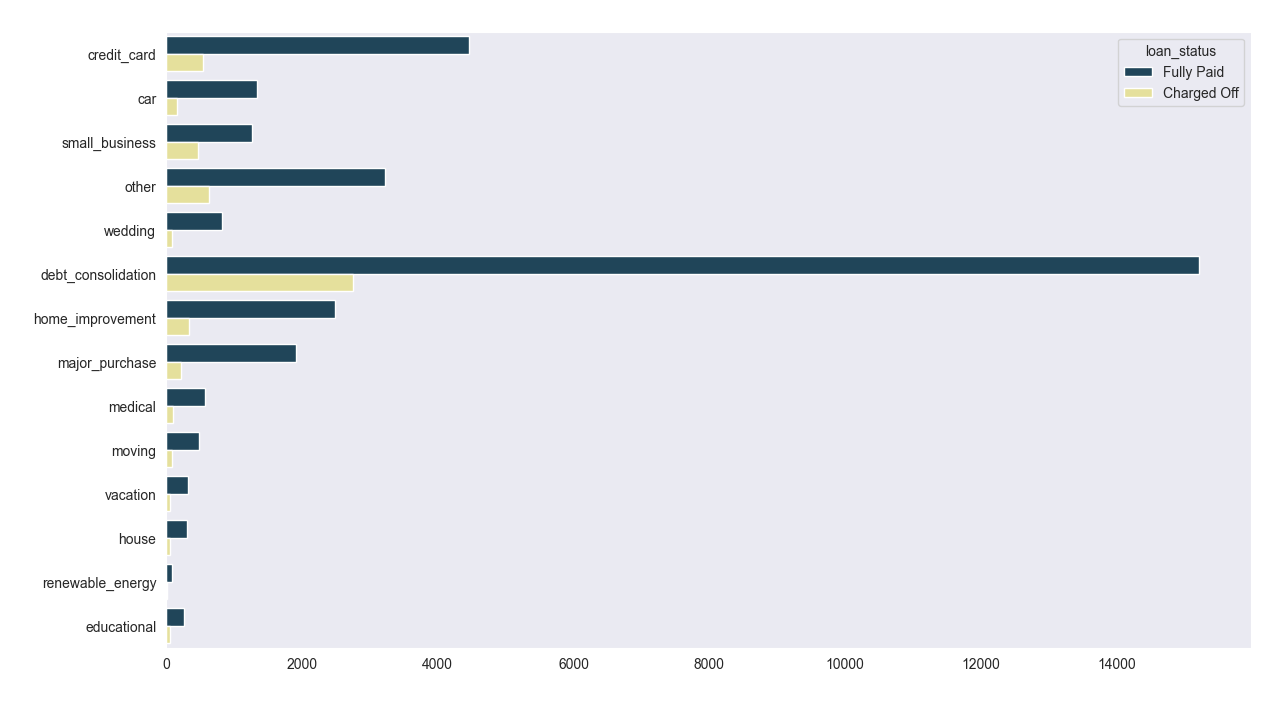

In [19]:
print("Purpose of Loan\n")
plt.figure(figsize=(14,8))
sns.set_style("dark")
palette = ["#164863", "#F1EB90"]
ax = sns.countplot(y="purpose",data=df,hue='loan_status', palette=palette)
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

The above plot shows that most loans are being taken for the purpouse of debt consolidation and payment of credit card bills.

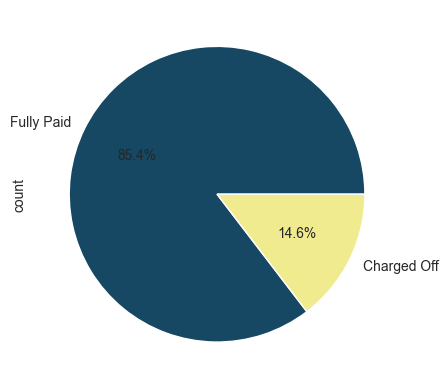

In [20]:
# We plot the distribution ratio of Loan status
df['loan_status'].value_counts().plot.pie(autopct='%1.1f%%', colors=palette)
plt.show()

This shows that a majority of loans 85.4% are getting paid fully

In [31]:
# Determining the loans that are bad from loan_status column
bad_loan = ["Charged Off"]


df['loan_condition'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return "Not fully repaid"
    else:
        return "Loans being Repaid"
    
    
df['loan_condition'] = df['loan_status'].apply(loan_condition)

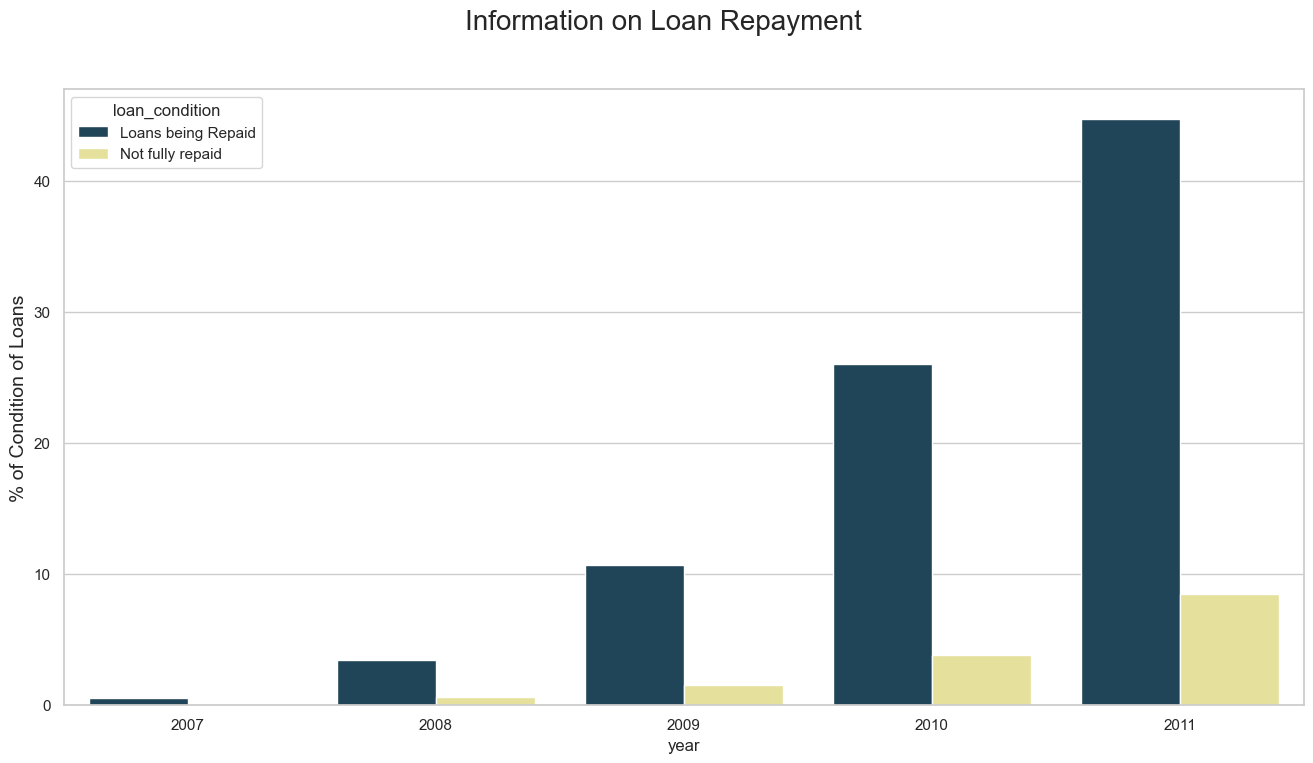

In [36]:
plt.figure(figsize=(16, 8))

palette = ["#164863", "#F1EB90"]

labels = ["Loans being Repaid", "Not fully repaid"]
plt.suptitle('Information on Loan Repayment', fontsize=20)

# Creating a barplot
ax = sns.barplot(x="year", y="loan_amnt", hue="loan_condition", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax.set_ylabel('% of Condition of Loans', fontsize=14)
plt.show()


Depending on year column we created, we make a bar chart showing whether a loan was good or bad meaning paid fully or charged off. The lot clearly shows how number of good loans are steadily rising over the years.

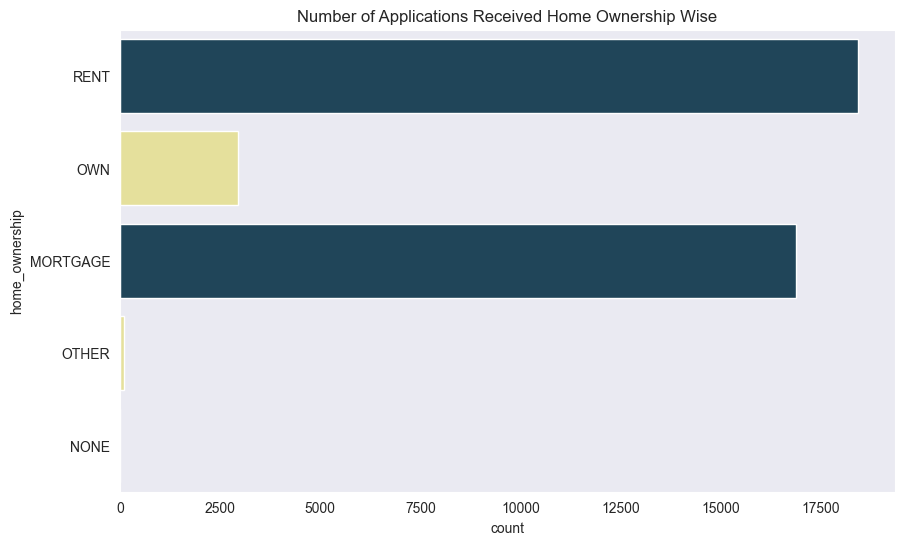

In [23]:
# Let us see applications recieved home ownership wise
df['home_ownership'].unique()
plt.figure(figsize=(10,6))
ax = sns.countplot(df['home_ownership'], palette=palette)
plt.title("Number of Applications Received Home Ownership Wise")
plt.show()

A large number of loan applications was recieved when the applicant lived in a house paying mortgage or in a rented house.

Ordered categorical variable


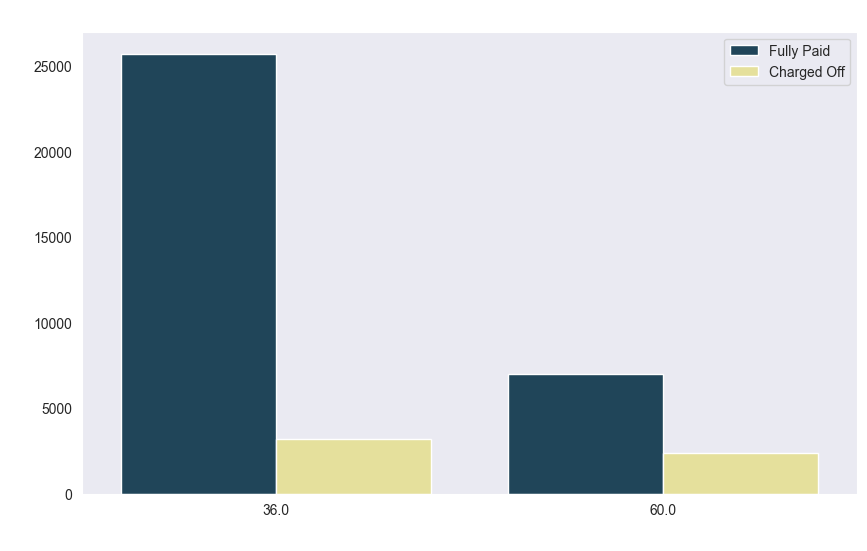

In [24]:
# Let us check whether there is any correlation between duration of loan repayment choosen and number of applicants
print("Ordered categorical variable")
plt.figure(figsize=(10,6))
ax = sns.countplot(x="term",data=df,hue='loan_status',palette=palette)
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

Looking at the chart, we find that those that opted for a 60 month loan repayment had greater chances of being charged off as compared to those that opted for 36 month repayment.

In [25]:
# Let us check how annual income affects being charged off

# We create custom ranges for income
income_ranges = [0, 25000, 50000, 75000, float('inf')]
income_labels = ['very low', 'low', 'medium', 'high']

# Creating a new column 'annual_inc_category' based on custom income ranges
df['annual_inc_category'] = pd.cut(df['annual_inc'], bins=income_ranges, labels=income_labels, right=False)

# Group the data by 'annual_inc_category' and calculate the proportion of charged off loans
inc_category_vs_loan = df.groupby('annual_inc_category')['loan_status'].value_counts(normalize=True).unstack().fillna(0)
inc_category_vs_loan['Chargedoff_Proportion'] = inc_category_vs_loan['Charged Off']

# Reset the index to make 'annual_inc_category' a regular column
inc_category_vs_loan = inc_category_vs_loan.reset_index()

# Print the result
print(inc_category_vs_loan)

loan_status annual_inc_category  Charged Off  Fully Paid  \
0                      very low     0.195397    0.804603   
1                           low     0.165796    0.834204   
2                        medium     0.146167    0.853833   
3                          high     0.116893    0.883107   

loan_status  Chargedoff_Proportion  
0                         0.195397  
1                         0.165796  
2                         0.146167  
3                         0.116893  


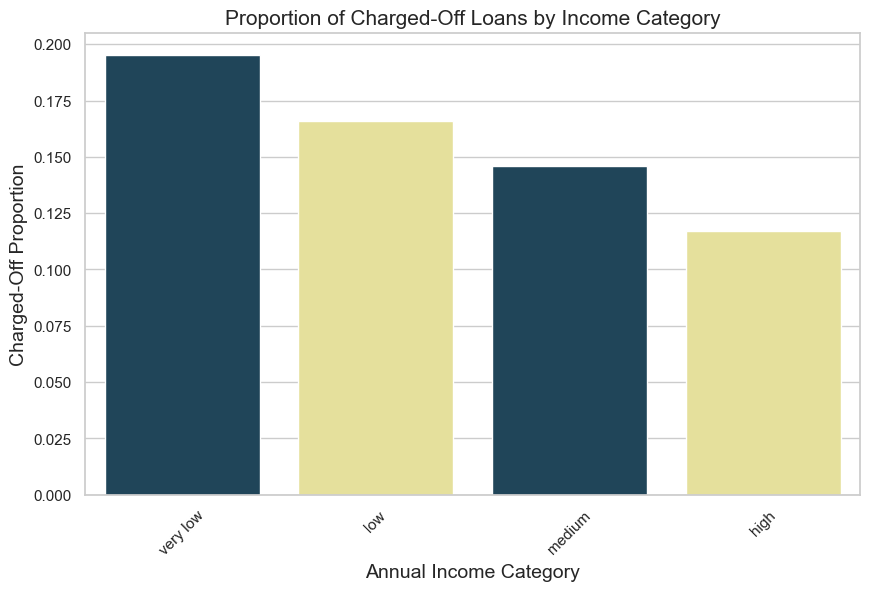

In [26]:
plt.figure(figsize=(10, 6))

# Creating a plot
sns.set_theme(style="whitegrid")  # Use whitegrid style for the plot
ax1 = sns.barplot(x='annual_inc_category', y='Chargedoff_Proportion', data=inc_category_vs_loan, palette=palette)

ax1.set_title('Proportion of Charged-Off Loans by Income Category', fontsize=15)
ax1.set_ylabel('Charged-Off Proportion', fontsize=14)
ax1.set_xlabel('Annual Income Category', fontsize=14)
plt.xticks(rotation=45)

plt.show()

From the above it is clear that those with lower income are uch more likely to get charged off rather than fully repaying the loan amount.

In [27]:
# Let us form numeric columns so that correlation can be found out between the columns for further investigation
numeric_columns = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_columns.corr()

numeric_columns.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'annual_inc',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'year'],
      dtype='object')

In [28]:
# Set a correlation threshold for columns to be dropped
correlation_threshold = 0.2

# Calculate the mean absolute correlation for each column
mean_corr = correlation_matrix.abs().mean()

# Identify columns with mean correlation below the threshold
low_corr_columns = mean_corr[mean_corr < correlation_threshold].index

# Drop the low correlation columns from the DataFrame
numeric_columns_dropped = numeric_columns.drop(columns=low_corr_columns)

print("Columns with low correlations that were dropped:")
print(low_corr_columns)

numeric_columns_dropped = numeric_columns_dropped.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths'],axis=1)

Columns with low correlations that were dropped:
Index(['term', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'year'],
      dtype='object')


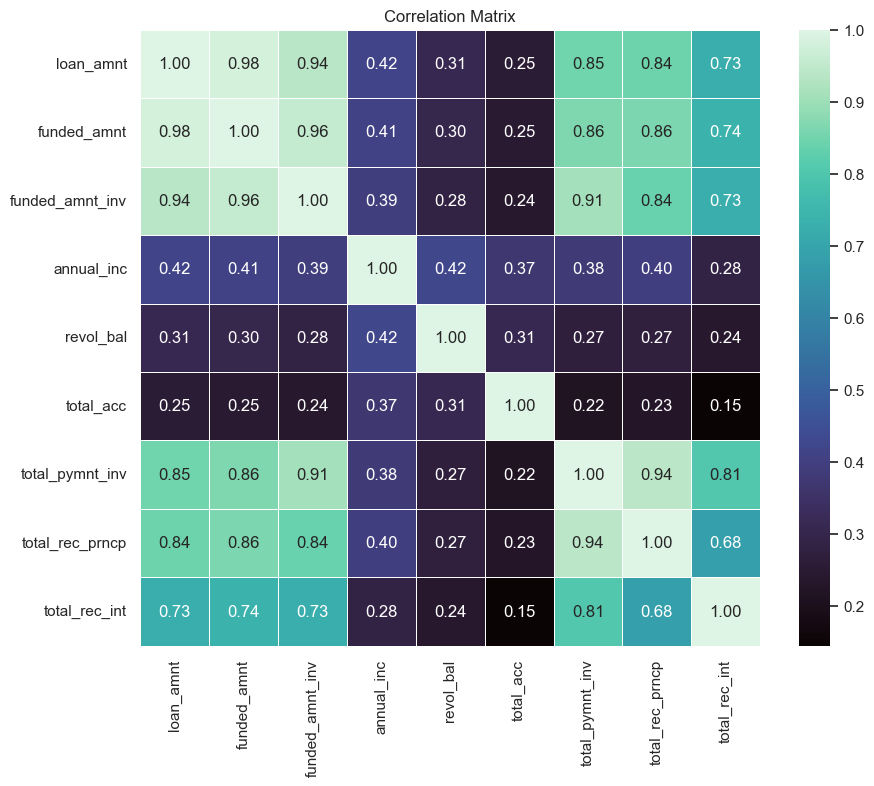

In [29]:
correlation_matrix = numeric_columns_dropped.corr()

plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='mako', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

We can observe that Loan amount, investor amount, funding amount are highly correlated